In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

Begin by defining a binary string that will serve as your secret number.  The string can be however long as you like.

In [2]:
#chose a secret number
secretnumber = '1010'

Now, build a general quantum circuit that contains the same number of qubits as the number of digits your secret number has, and an equal number of classical bits.  Apply Hadamard gates to all but the last qubit.  To the last qubit apply an X gate then a Hadamard gate.  Consider what function the HX serves. 

In [3]:
#building a quantum circuit with the number of qubits equal to the number of bitwise digits in the secret number 
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

Next, create a for loop to entangle your last qubit to only those qubits that are measuring a 1 on the secret number.  What would happened if you entangled all the other qubits to the last qubit instaed of just the ones measuring 1?

In [4]:
#CNOT is applied to those digits that are a 1, analogous to the AND operator in classical computing
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
circuit.barrier()

Finally, apply Hadamard gates to all but the last qubit and measure all bit the last qubit

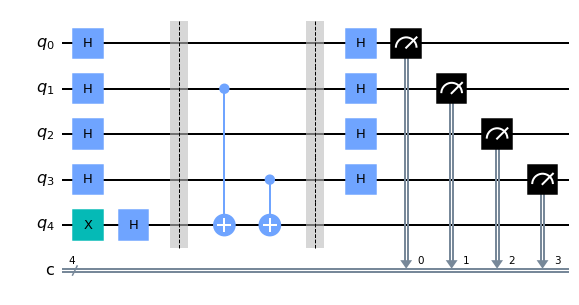

In [5]:
circuit.h(range(len(secretnumber)))

#measuring
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))
circuit.draw(output='mpl')

Run the simulation with only 1 shot.  Was the guess correct? 

In [6]:
#using the backend to simulate this circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1010': 1}


Optionally, run this algorithm on a quantum computer.  Try 1, 10, 100, and 1000 shots.  What if anything changes?  **Note:** it is best to keep your secret number to four digits or less to stay within the quantum computer's open resource allocation.

In [7]:
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

In [8]:
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(circuit, backend)
job = backend.run(t_qc, shots = 1000)
job_monitor(job) 

Job Status: job has successfully run


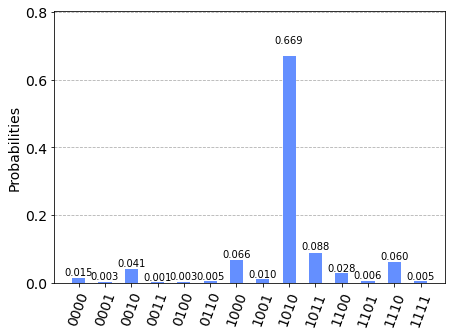

In [10]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)